### Exercise 2.14: Zipf's Law
In this exercise, we will plot both the expected and actual ranks and frequencies of tokens with the help of Zipf's law. We will be using the 20newsgroups dataset provided by the sklearn library, which is a collection of newsgroup documents.

In [9]:
import nltk
nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# methods for loading stop words and the data from the newsgroup_data_sample variable
def get_stop_words():
    stop_words = stopwords.words('english')
    stop_words = stop_words + list(string.printable) 
    return stop_words

# In Python, string.printable will give the all sets of punctuation, digits, ascii_letters and whitespace.
# 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~ 

def get_and_prepare_data(stop_words):
    """
    This method will load 20newsgroupdata and remove stop words from it using the given stop word list
    :param stop_words:
    :return:
    """
    newsgroups_data_sample = fetch_20newsgroups(subset='train')
    tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) if word.lower() not in stop_words]
    return tokenized_corpus

In [3]:
# calculate frequency of each token:
def get_frequency(corpus, n):
    token_count_di = Counter(corpus)
    return token_count_di.most_common(n)

In [5]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [6]:
# call preceeding methods to calculate the frequency of top 50 most frequent tokens:
stop_word_list = get_stop_words() # get stop words
corpus = get_and_prepare_data(stop_word_list) # removing stop words
get_frequency(corpus, 50)

[('ax', 62412),
 ('edu', 21321),
 ('subject', 12265),
 ('com', 12134),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9017),
 ('would', 8910),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5977),
 ('like', 5868),
 ('university', 5589),
 ('posting', 5507),
 ('know', 5134),
 ('get', 4998),
 ('host', 4996),
 ('nntp', 4814),
 ('max', 4776),
 ('think', 4583),
 ('also', 4308),
 ('use', 4187),
 ('time', 4102),
 ('new', 3986),
 ('good', 3759),
 ('ca', 3546),
 ('could', 3511),
 ('well', 3480),
 ('us', 3364),
 ('may', 3313),
 ('even', 3280),
 ('see', 3065),
 ('cs', 3041),
 ('two', 3015),
 ('way', 3002),
 ('god', 2998),
 ('first', 2976),
 ('many', 2945),
 ('make', 2894),
 ('much', 2879),
 ('system', 2817),
 ('distribution', 2767),
 ('right', 2742),
 ('world', 2724),
 ('say', 2706),
 ('want', 2522),
 ('go', 2474),
 ('anyone', 2468),
 ('10', 2466),
 ('reply', 2463)]

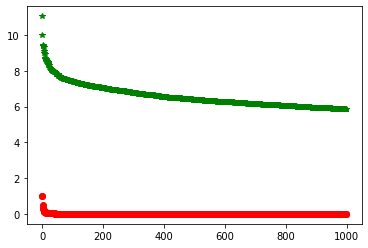

In [12]:
def get_actual_and_expected_frequencies(corpus):
    freq_dict = get_frequency(corpus, 1000)
    actual_frequencies = []
    expected_frequencies = []
    for rank, tup in enumerate(freq_dict):
        actual_frequencies.append(np.log(tup[1]))
        rank = 1 if rank == 0 else rank
        # expected frequency 1/rank as per zipf's law
        expected_frequencies.append(1/rank)
    return actual_frequencies, expected_frequencies

def plot(actual_frequencies, expected_frequencies):
    plt.plot(actual_frequencies, 'g*', expected_frequencies, 'ro')
    plt.show()
    
# We will plot the actual and expected frequencies
actual_frequencies, expected_frequencies = get_actual_and_expected_frequencies(corpus)
plot(actual_frequencies, expected_frequencies)